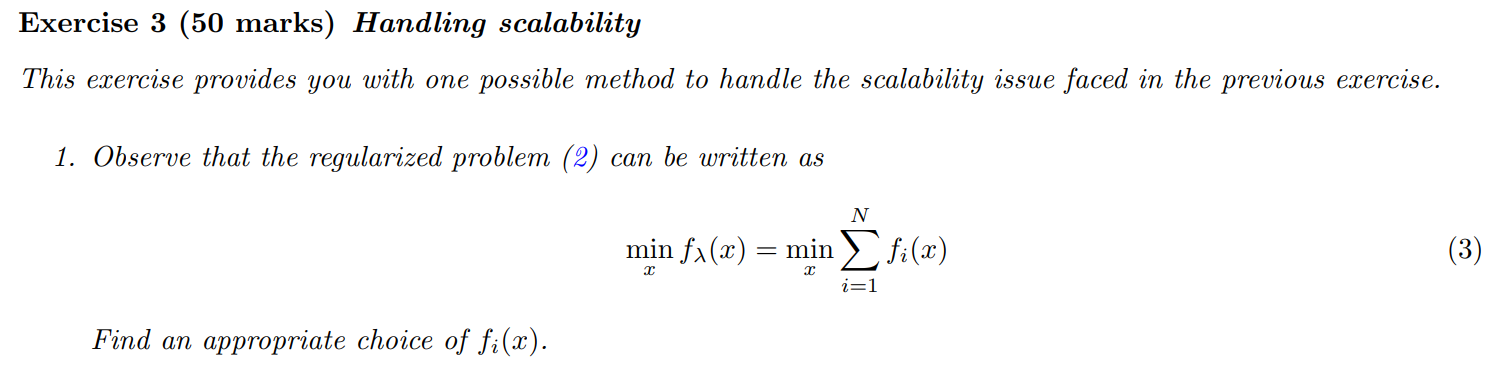





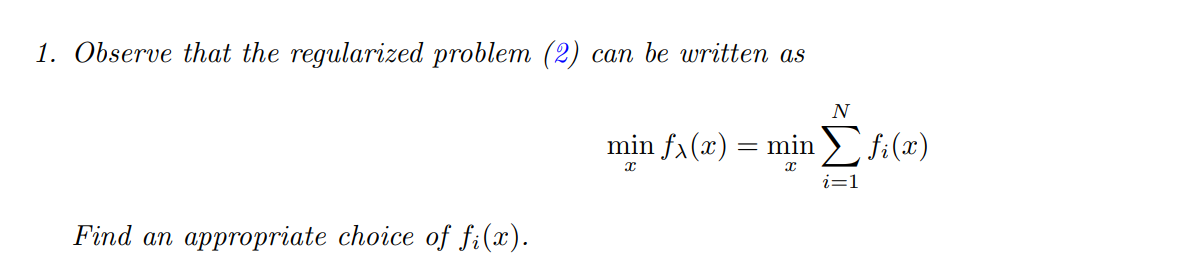

$$
\text{minimize} \quad f_{\lambda}(x) = \sum_{i=1}^{N} \left( f_i(x) + \frac{\lambda}{N} \|x\|_2^2 \right)
$$


Given the regularized problem:

$
f_{\lambda}(x) = \lambda \|x\|_2^2 + \frac{1}{2} \|\mathbf{Ax} - \mathbf{y}\|_2^2
$

We want to express it in the form:

$
f_{\lambda}(x) = \sum_{i=1}^{N} f_i(x)
$

where $ f_i(x) $ represents individual loss terms.

The regularization term $ \lambda \|x\|_2^2 $ can be divided among $ N $ loss terms, so each $ f_i(x) $ will include $ \frac{\lambda}{N} \|x\|_2^2 $.

Thus, we need to express $ f_i(x) $ as:

$
f_i(x) = \frac{\lambda}{N} \|x\|_2^2 + \frac{1}{2} \left( (\mathbf{a}_i^T x - y_i)^2 \right)
$

Where:
- $ \mathbf{a}_i^T $ is the transpose of the $ i $-th row of matrix $ A $, representing the features for the $ i $-th data point.
- $ y_i $ is the $ i $-th element of vector $ y $, representing the corresponding target value.
- $ \lambda $ is the regularization parameter.
- $ N $ is the number of data points.

This expression includes both the regularization term and the data loss term for each data point.




The regularization term $\lambda \frac{1}{2} \|x\|_2^2$ is added to the objective function to control the complexity of the model. It penalizes large parameter values, mitigating overfitting by discouraging overly complex models that fit noise instead of underlying patterns. This term introduces a bias into the model, reducing variance and improving generalization performance on unseen data. Regularization also enhances numerical stability during optimization, particularly with ill-conditioned matrices. By encouraging smoother solutions, regularization aids in handling noisy or correlated input features, leading to more robust models. In summary, the regularizer term $\lambda \frac{1}{2} \|x\|_2^2$ strikes a balance between fitting the training data and preventing overfitting, enhancing model robustness, generalization, and numerical stability.

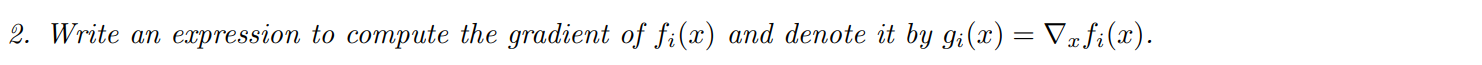

To compute the gradient of $ f_i(x) $, denoted by $ g_i(x) = \nabla_x f_i(x) $, we differentiate $ f_i(x) $ with respect to $ x $:

$f_i(x) = \frac{\lambda}{2N} \|x\|_2^2 + \frac{1}{2} \left( (\mathbf{a}_i^T x - y_i)^2 \right) $

Also,

$$
\nabla{f(x)} = \nabla\frac{1}{2}\|A x-y\|^2 + \frac{\lambda}{2} x^Tx=\nabla\frac{1}{2} \sum_{i=1}^n\left\|a_i^T x-y_i\right\|^2 + \frac{\lambda}{2} x^Tx
$$
$$
 = \sum_{i=1}^n(a_i^T x-y_i)a_i + \lambda x
$$
For particular row of A we can evaluate gradient as,
$$
g_i(x) = \nabla{f_i(x)}=\nabla_x{ ( \frac{1}{2}\left\|a_i^T x-y_i\right\|^2+\frac{\lambda}{N} x^Tx )}
$$

$$
 = (a_i^Tx - y_i)a_i + \frac{\lambda}{N}x
$$

The gradient $ g_i(x) $ of $ f_i(x) $ with respect to $ x $ is:

$g_i(x) = \nabla_x f_i(x) = \frac{\lambda}{N} x + (\mathbf{a}_i^T x - y_i) \mathbf{a}_i $

In this expression:
- The first term $ \lambda x $ comes from differentiating the regularization term $ \frac{\lambda}{2} \|x\|_2^2 $ with respect to $ x $.
- The second term $ (\mathbf{a}_i^T x - y_i) \mathbf{a}_i $ comes from differentiating the data loss term $ \frac{1}{2} \left( (\mathbf{a}_i^T x - y_i)^2 \right) $ with respect to $ x $.



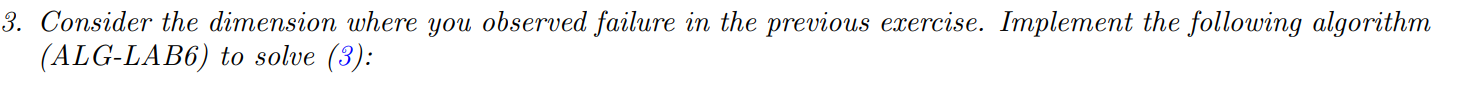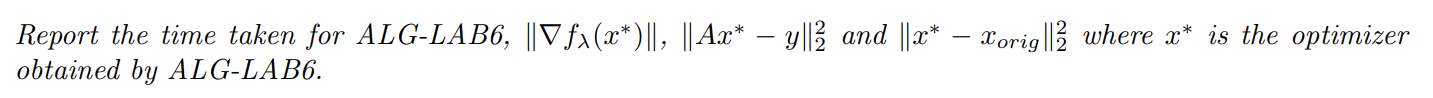

In [2]:
def f(x,A,y, lamda):
  return 0.5*np.linalg.norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)
def f_i(x,A,y,lamda,i):
  return 0.5*(1/N)*lamda*np.dot(x,x)+ 0.5*np.linalg.norm(A[i]@x-y[i])**2
def gx(x,A,y,lamda,i,N):
  return (((lamda)*x[i]))*(1/N)+((np.transpose(A[i,:])@x)-y[i])*A[i,:]
def grad_flamda(x,A,y, lamda):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x
def grad_fx(x,A,y, lamda):
  sum = np.array([0. for _ in range(d)])
  for i in range(N):
    sum += (A[i]@x - y[i])[0]*A[i]
  sum += lamda*x
  return sum

In [6]:
import numpy as np


In [7]:
np . random . seed (1000) #for repeatability
N = 200
d = 20000#,10**4,10**5] # Consider the dimension which caused failure in the previous experiment

lambda_reg = 0.001
eps = np . random . randn (N ,1) # random noise
# Create data matrix , label vector
A = np.random.randn(N,d)
# Normalize the columns

In [9]:
print(A.shape)

(200, 20000)


In [ ]:
# Code for ALG - LAB6
import numpy as np
import timeit
np . random . seed (1000) #for repeatability
N = 200
d = 20000#,10**4,10**5] # Consider the dimension which caused failure in the previous experiment

lambda_reg = 0.001
eps = np . random . randn (N ,1) # random noise
# Create data matrix , label vector
A = np.random.randn(N,d)
# Normalize the columns
for j in range ( A . shape [1]) :
  A [: , j ] = A [: , j ]/ np . linalg . norm ( A [: , j ])
xorig = np . ones ( (d ,1) )
y = np . dot (A , xorig ) + eps
# initialize the optimization variable to be used in the new algo ALG - LAB6
x = np . zeros (( d ,1) ).flatten()
epochs = 10**4 # initialize the number of rounds needed to process
t = 1
arr = np . arange ( N ) # index array
start = timeit . default_timer () # start the timer

for epoch in range(epochs) :
  np . random . shuffle ( arr ) # shuffle every epoch
  for i in np . nditer ( arr ) : # Pass through the data points
  # Update x using x <- x - 1/t * g_i (x)


    x=x-(1/t)*(gx(x,A,y,lambda_reg,i,N))

    t = t +1
    if t >1e4 :
      t = 1

print('grad:',np.linalg.norm(grad_fx(x,A,y, lambda_reg)))
alglab6time = timeit . default_timer () - start # time is in seconds
x_alglab6 = x
xorig=xorig.flatten()

print(f'time taken :{alglab6time} for epoch {epochs}  |   ∥∇fλ(x_alglab6)∥: {np.linalg.norm(grad_fx(x,A,y, lambda_reg))}   |   ||Ax_alglab6 - y||^2 : {np.linalg.norm(A@x-y)**2}    |     ||x_alglab6 - xorig ||^2 : {np.linalg.norm(x-xorig)**2}')
# print the time taken , || Ax_alglab6 - y||^2 , || x_alglab6 - xorig ||^2

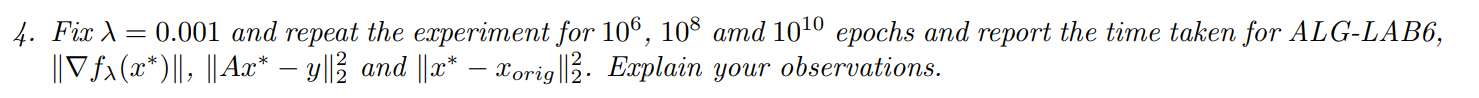

In [ ]:
# Code for ALG - LAB6
import numpy as np
import timeit
np . random . seed (1000) #for repeatability
N = 200
d = 2*10**4#,10**4,10**5] # Consider the dimension which caused failure in the previous experiment

lambda_reg = 0.001
eps = np . random . randn (N ,1) # random noise
# Create data matrix , label vector
A = np.random.randn(N,d)
# Normalize the columns
for j in range ( A . shape [1]) :
  A [: , j ] = A [: , j ]/ np . linalg . norm ( A [: , j ])
xorig = np . ones ( (d ,1) )
y = np . dot (A , xorig ) + eps
# initialize the optimization variable to be used in the new algo ALG - LAB6
x = np . zeros (( d ,1) ).flatten()
epochs = [10**3,10**4,10**5] # initialize the number of rounds needed to process
t = 1
arr = np . arange ( N ) # index array
start = timeit . default_timer () # start the timer
for epo in epochs:
  for epoch in range(epo) :
    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np . nditer ( arr ) : # Pass through the data points
    # Update x using x <- x - 1/t * g_i (x)


      x=x-(1/t)*(gx(x,A,y,lambda_reg,i,N))

      t = t +1
      if t >1e4 :
        t = 1

  alglab6time = timeit . default_timer () - start # time is in seconds
  x_alglab6 = x
  xorig=xorig.flatten()
  print(f'time taken :{alglab6time} for epoch {epo}   |   ∥∇fλ(x_alglab6)∥: {np.linalg.norm(grad_fx(x,A,y, lambda_reg))}   |   ||Ax_alglab6 - y||^2 : {np.linalg.norm(A@x-y)**2}    |     ||x_alglab6 - xorig ||^2 : {np.linalg.norm(x-xorig)**2}')
  # print the time taken , || Ax_alglab6 - y||^2 , || x_alglab6 - xorig ||^2
  print(".............................................................................................................................................")

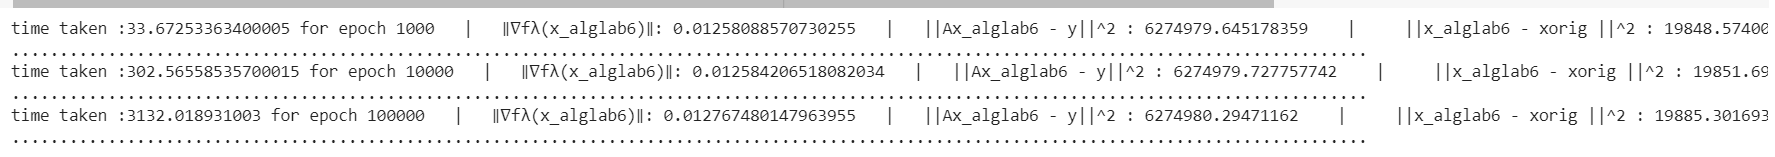

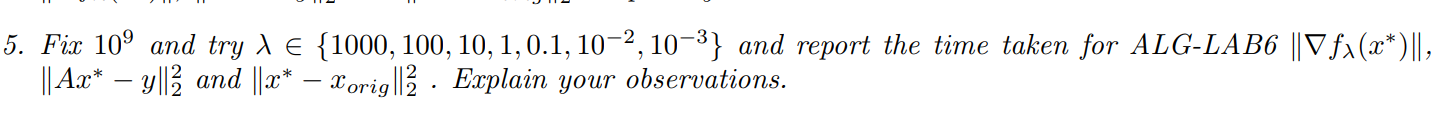

In [ ]:
import numpy as np
import timeit
np . random . seed (1000) #for repeatability
N = 200
d = 20000#,10**4,10**5] # Consider the dimension which caused failure in the previous experiment

lamda=[1000,100,10,1,0.1,0.01,0.001]
eps = np . random . randn (N ,1) # random noise
# Create data matrix , label vector
A = np.random.randn(N,d)
# Normalize the columns
for j in range ( A . shape [1]) :
  A [: , j ] = A [: , j ]/ np . linalg . norm ( A [: , j ])
xorig = np . ones ( (d ,1) )
y = np . dot (A , xorig ) + eps
# initialize the optimization variable to be used in the new algo ALG - LAB6
x = np . zeros (( d ,1) ).flatten()
epochs = 10**5 # initialize the number of rounds needed to process
t = 1
arr = np . arange ( N ) # index array
start = timeit . default_timer () # start the timer
for lambda_reg in lamda:
  for epo in range(epochs):

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np . nditer ( arr ) : # Pass through the data points
    # Update x using x <- x - 1/t * g_i (x)


      x=x-(1/t)*(gx(x,A,y,lambda_reg,i,N))

      t = t +1
      if t >1e4 :
        t = 1

  alglab6time = timeit . default_timer () - start # time is in seconds
  x_alglab6 = x
  xorig=xorig.flatten()
  print(f'time taken :{alglab6time} for lambda :{lambda_reg}   |   ∥∇fλ(x_alglab6)∥: {np.linalg.norm(grad_fx(x,A,y, lambda_reg))}   |   ||Ax_alglab6 - y||^2 : {np.linalg.norm(A@x-y)**2}    |     ||x_alglab6 - xorig ||^2 : {np.linalg.norm(x-xorig)**2}')
  # print the time taken , || Ax_alglab6 - y||^2 , || x_alglab6 - xorig ||^2
  print(".............................................................................................................................................")

time taken :2813.225943566 for lambda :1000   |   ∥∇fλ(x_alglab6)∥: 12530.493827230988   |   ||Ax_alglab6 - y||^2 : 6281505.910814845    |     ||x_alglab6 - xorig ||^2 : 20181.96883002047
.............................................................................................................................................
time taken :5682.358005227 for lambda :100   |   ∥∇fλ(x_alglab6)∥: 1249.2208715114682   |   ||Ax_alglab6 - y||^2 : 6265500.594613631    |     ||x_alglab6 - xorig ||^2 : 20223.04518569349
.............................................................................................................................................
time taken :8389.088694981001 for lambda :10   |   ∥∇fλ(x_alglab6)∥: 128.4824810004462   |   ||Ax_alglab6 - y||^2 : 6275617.799025631    |     ||x_alglab6 - xorig ||^2 : 20515.66851288649
.............................................................................................................................................
time taken 

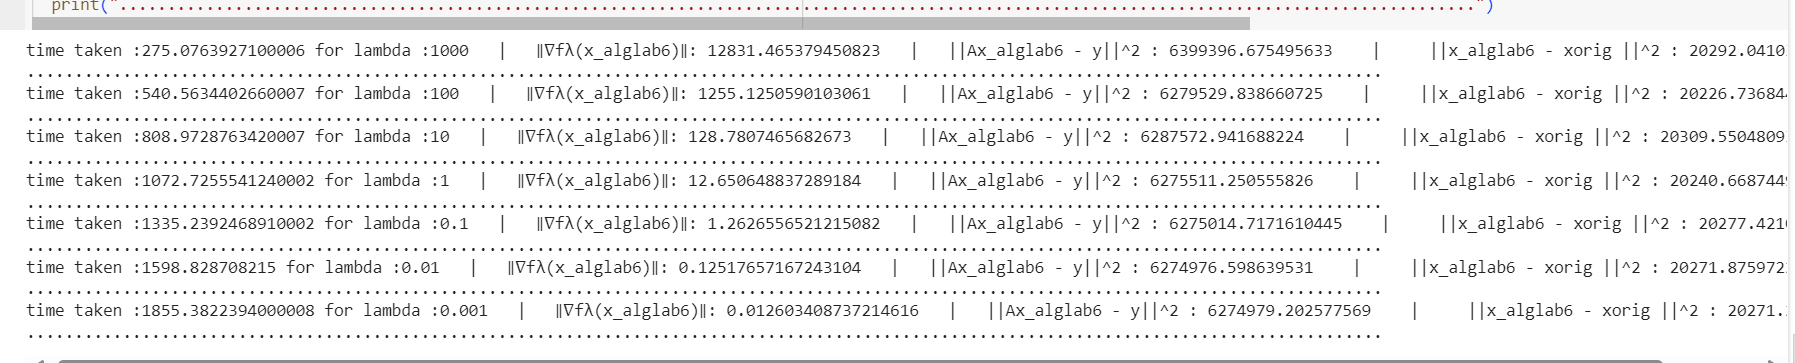

Their is trend between all the values that is as we changes lambda, time increases and on decreasing lambda time increases ,value of gradient norm decreases and similarly we can compare other factors with time and lambda So for large values of d we use this approach but time taken is large as compared to previous methods and on changing lamda we can observe changes in values of gradient and difference so as regularizer that is lambda decreases we approaches near to our solution.

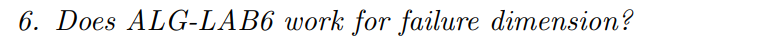

Yes , this method works for failure dimension(20000) in previous method but we move away from solution that is we deviate some what from original but we obtain the solution .

image.png

The ALG-LAB6 algorithm is executed for each specified number of epochs. In each epoch, the data points are shuffled, and for each data point, the optimization variable \( x \) is updated using the gradient descent rule:

$ x \leftarrow x - \frac{1}{t} \nabla_x f_i(x) $

Here, \( t \) represents the iteration number. The regularization term is incorporated into the gradient calculation.

This algorithm aims to minimize the regularized objective function iteratively, adjusting the optimization variable 'x' to minimize both the data loss term and the regularization term.

The efficiency and effectiveness of the ALG-LAB6 algorithm are influenced by several factors. Firstly, the choice of optimization parameters, such as the learning rate and the number of epochs, plays a crucial role. A smaller learning rate may lead to slower convergence, while a larger learning rate can cause oscillations or divergence. Similarly, adjusting the number of epochs affects the algorithm's convergence behavior, with insufficient epochs resulting in premature convergence and excessive epochs leading to overfitting or slow convergence.

Secondly, the conditioning of the optimization problem significantly impacts the algorithm's performance. Ill-conditioned problems, where the Hessian matrix is close to singular or has very large condition numbers, pose challenges for optimization algorithms like ALG-LAB6. In such cases, the algorithm may converge slowly, exhibit numerical instability, or fail to converge altogether.

Additionally, the presence of noise in the data affects the robustness of the algorithm. Noisy data can introduce fluctuations in the objective function, making it harder for the algorithm to find the true minimum. Regularization, controlled by the parameter $ \lambda $, helps mitigate the effects of noise by penalizing large parameter values and promoting smoother solutions. However, the choice of $ \lambda $ is crucial, as too small a value may result in insufficient regularization, while too large a value can suppress important features in the data.

Overall, the performance of ALG-LAB6 depends on a delicate balance between optimization parameters, problem conditioning, and noise in the data. Fine-tuning these factors is essential for achieving efficient and effective convergence to the optimal solution.

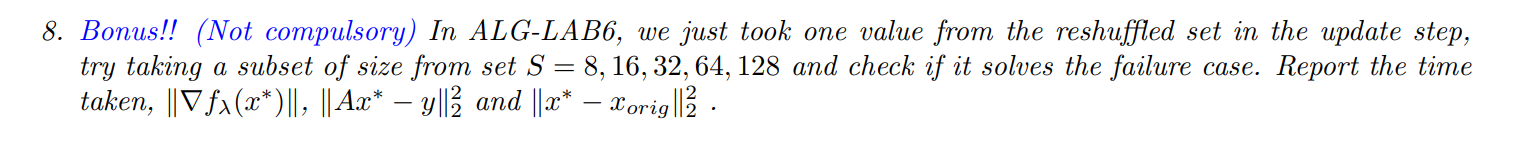

In [ ]:
np . random . seed (1000) #for repeatability
N = 200
d = 2*10**4#,10**4,10**5] # Consider the dimension which caused failure in the previous experiment

lambda_reg = 0.001
eps = np . random . randn (N ,1) # random noise
# Create data matrix , label vector
A = np.random.randn(N,d)
# Normalize the columns
for j in range ( A . shape [1]) :
  A [: , j ] = A [: , j ]/ np . linalg . norm ( A [: , j ])
xorig = np . ones ( (d ,1) )
y = np . dot (A , xorig ) + eps
# initialize the optimization variable to be used in the new algo ALG - LAB6
x = np . zeros (( d ,1) ).flatten()
epochs = [10**3,10**4,10**5] # initialize the number of rounds needed to process
t = 1
arr = np . arange ( N ) # index array
start = timeit . default_timer () # start the timer
subset_sizes = [8, 16, 32, 64, 128]  # Set S: subset sizes to try

for subset_size in subset_sizes:
  print(f"Subset size: {subset_size}")
  for epo in epochs:
    for epoch in range(epo) :
      np . random . shuffle ( arr ) # shuffle every epoch
      subset_indices = np.random.choice(arr, size=subset_size, replace=False)
      for i in subset_indices:# Pass through the data points
      # Update x using x <- x - 1/t * g_i (x)


        x=x-(1/t)*(gx(x,A,y,lambda_reg,i,N))

        t = t +1
        if t >1e4 :
          t = 1

    alglab6time = timeit . default_timer () - start # time is in seconds
    x_alglab6 = x
    xorig=xorig.flatten()
    print(f'time taken :{alglab6time} for epoch {epo}   |   ∥∇fλ(x_alglab6)∥: {np.linalg.norm(grad_fx(x,A,y, lambda_reg))}   |   ||Ax_alglab6 - y||^2 : {np.linalg.norm(A@x-y)**2}    |     ||x_alglab6 - xorig ||^2 : {np.linalg.norm(x-xorig)**2}')
    # print the time taken , || Ax_alglab6 - y||^2 , || x_alglab6 - xorig ||^2
  print(".............................................................................................................................................")

Subset size: 8
time taken :0.8752804120013025 for epoch 1000   |   ∥∇fλ(x_alglab6)∥: 2614.2136308668582   |   ||Ax_alglab6 - y||^2 : 20949997.629699938    |     ||x_alglab6 - xorig ||^2 : 20595.342087861518
time taken :11.085488970002189 for epoch 10000   |   ∥∇fλ(x_alglab6)∥: 9.556850638482011   |   ||Ax_alglab6 - y||^2 : 6278813.769578052    |     ||x_alglab6 - xorig ||^2 : 19848.236938501464
time taken :108.48842631700245 for epoch 100000   |   ∥∇fλ(x_alglab6)∥: 0.01278718675318752   |   ||Ax_alglab6 - y||^2 : 6274979.580793448    |     ||x_alglab6 - xorig ||^2 : 19849.74277425173
.............................................................................................................................................
Subset size: 16
time taken :110.67018693499995 for epoch 1000   |   ∥∇fλ(x_alglab6)∥: 0.01233604341379197   |   ||Ax_alglab6 - y||^2 : 6274978.565044154    |     ||x_alglab6 - xorig ||^2 : 19849.78564011089
time taken :130.0763634490031 for epoch 10000   |   ∥∇fλ(x_a

image.png

ALGLAB_06 depensds  on factors such as computational resources, dataset characteristics, and optimization objectives. Individual updates involve processing each data point in every iteration, ensuring thorough consideration of all information but demanding significant computational resources. Conversely, subset updates involve using a subset of data points in each iteration, offering computational efficiency, particularly for large datasets, but potentially sacrificing some information. Subset updates may converge faster and are beneficial for computational efficiency, especially when resources are limited(google colab), while individual updates prioritize accuracy but require higher computational costs.

It is clear by observing results of subsets and individual selection that time taken is less in subsets and for specific value of subset it shows better result or more fast converge towards the solution irrespective deoendence on epoch as number of subsets increases time for execution increases but we get more precise or more accuracy as compare to other subset which has less value therefore we can say for suitable choice of all factors lead to convergent solution with minimal time .